In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [236,236]

train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/val'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE +[3], weights='imagenet', include_top= False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
from keras.src.applications import inception_resnet_v2
for layer in inception.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/dataset/val/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
from keras.src.layers.serialization import activation

prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = inception.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 236, 236, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 117, 117, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 117, 117, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 117, 117, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/val',
    target_size =(236,236),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 544 images belonging to 12 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/val',
    target_size =(236,236),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 544 images belonging to 12 classes.


In [ ]:
no_classes = len(training_set)
print(no_classes)

17


In [ ]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
17/17 [==============================] - 448s 26s/step - loss: 11.6685 - accuracy: 0.4504 - val_loss: 4.8279 - val_accuracy: 0.7151
Epoch 2/10
17/17 [==============================] - 256s 16s/step - loss: 3.3089 - accuracy: 0.7960 - val_loss: 1.4487 - val_accuracy: 0.8768
Epoch 3/10
17/17 [==============================] - 239s 14s/step - loss: 1.4238 - accuracy: 0.8805 - val_loss: 1.6047 - val_accuracy: 0.8438
Epoch 4/10
17/17 [==============================] - 240s 15s/step - loss: 0.9741 - accuracy: 0.8952 - val_loss: 0.7106 - val_accuracy: 0.9393
Epoch 5/10
17/17 [==============================] - 245s 15s/step - loss: 0.8074 - accuracy: 0.9154 - val_loss: 0.7301 - val_accuracy: 0.9320
Epoch 6/10
17/17 [==============================] - 231s 14s/step - loss: 0.8719 - accuracy: 0.9136 - val_loss: 0.4594 - val_accuracy: 0.9596
Epoch 7/10
17/17 [==============================] - 230s 14s/step - loss: 0.4464 - accuracy: 0.9540 - val_loss: 0.3255 - val_accuracy: 0.9632
Epoch

In [ ]:
import matplotlib.pyplot as plt

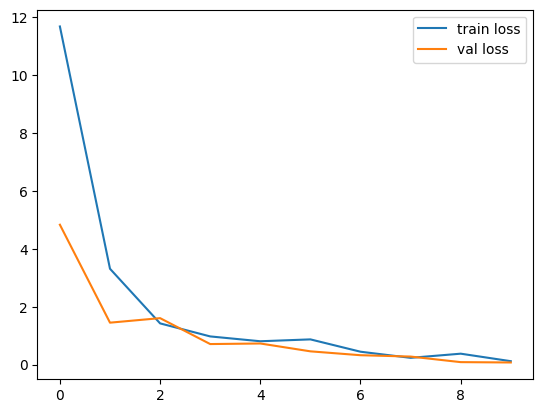

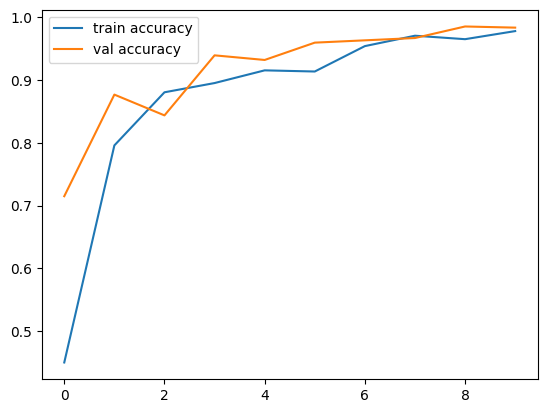

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')


In [ ]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
